### Data Wrangling

#### In this notebook we clean and prepare the data for the next step. The output will be a csv file that we can the use for data exploration

In [1]:
#First we import the required libraries

import pandas as pd,pickle, sys, itertools, string, sys, re, datetime, time, shutil, copy
import numpy as np
import re
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

##### We then load the csv of the original data

In [2]:
data = pd.read_csv('/home/stush/Personal Projects/Project Credit/data/clients.csv')

#### We create functions that we will use for data wrangling

In [3]:
def displayall(df):
    """
    Setting the maximum rows and columns to to 1000.
    This is to enable us view all the features in the data set
    
    """
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)
            
def format_date(df,col,newcol):
    """
    Function to format date to mm/dd/yy for easy aggregation
    
    """
    
    df[newcol] = pd.to_datetime(df[col]).apply(lambda x : x.strftime("%m/%d/%Y"))
    
    
def to_date(df,col):
    """
    Function to convert column to date
    
    """
    df[col] = pd.to_datetime(df[col])
    
def drop_columns (df,column_list):
    """
    Function to drop columns.
    
    column_list = list of columns to be dropped
    
    """
    df.drop(column_list,axis=1)
    return df


def add_datepart(df, fldname, drop=True):
    
    """
    add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace
    
    """
    
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())   


def filter_na (df,column):
    """
    Function to filter data frame based on missing values in a certain column
    
    """
    drop_col = column
    new_df = df[df[drop_col].notnull()]
    return new_df
    
def count_null (df):
    """
    Function to count null values in a data frame
    
    """
    return df.isna().sum()

def plot_groups(col):
    """
    Function for group by plot
    
    """
    sn.countplot(col)
    
    
def days_time_diff (df,dateone,datetwo,newcolumn):
    """
    Function to create a new column based on the difference in days of two date columns.
    First the columns are changed to datetime format
    
    """
    to_date(df,dateone)
    to_date(df,datetwo)
    
    df[newcolumn] = (df[dateone] - df[datetwo]).dt.days

#### We display the transposed version of the data set just to see the contents

In [4]:
displayall(data.transpose())

0     \
ClientID                                                   3325   
Loans                                                         1   
DefaultedLoans                                                1   
NonPerformingLoans                                            1   
ClearedLoans                                                  0   
AvgLoanAmount                                              1000   
LastLoanAmount                                             2000   
LastLoanPeriod                                               10   
Lending                                                       0   
AvgLendingAmount                                              0   
LastLendingAmount                                             0   
LastLoanOn                              2018-06-17 15:59:13.600   
LastDefaultOn                           2018-06-27 16:11:55.203   
LastNpaOn                               2018-08-27 02:04:04.147   
Createdon                               2018-03-22 11:18:59.000   
Defaulted >  10 Days                                          1   
LastDefault > 10 On                     2018-07-08 02:09:37.923   
LastRepaymentOn                                             NaN   
MaxLoanAmount                                              2000   
LastDefault > 2on                                           NaN   
Defaulted>2                                                   1   
CRBListed                                                     0   
LoanLimit                                                  2000   
LastLimitOn                             2018-10-16 19:23:04.507   
grade                                                        CC   
MobileLoansScore                                            649   
Propability                                               15.27   
avgMobiLoanPrincipalAmountmySector                            0   
creditHistorymySector                                        17   
creditHistoryotherSector                                     23   
lastMobiLoanPrincipalAmountmySector                           0   
lastMobiLoanPrincipalAmountotherSector                     4700   
maxMobiLoanPrincipalAmountmySector                            0   
maxMobiLoanPrincipalAmountotherSector                      4700   
paAccountsmySector                                            1   
paAccountsotherSector                                         5   
npaAccountsmySector                                           0   
npaAccountsotherSector                                        0   
paAccountsWithDhmySector                                      1   
paAccountsWithDhotherSector                                   1   

                                                           1     \
ClientID                                                   3391   
Loans                                                         2   
DefaultedLoans                                                2   
NonPerformingLoans                                            1   
ClearedLoans                                                  1   
AvgLoanAmount                                              1125   
LastLoanAmount                                             2000   
LastLoanPeriod                                               10   
Lending                                                       0   
AvgLendingAmount                                              0   
LastLendingAmount                                             0   
LastLoanOn                              2018-09-15 14:21:24.857   
LastDefaultOn                           2018-09-25 14:23:19.690   
LastNpaOn                               2018-11-25 02:19:57.240   
Createdon                               2018-03-22 12:47:40.000   
Defaulted >  10 Days                                          2   
LastDefault > 10 On                     2018-10-06 01:33:01.537   
LastRepaymentOn                         2018-08-01 10:57:22.180   
MaxLoanAmount                         

In [5]:
#Some info about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
ClientID                                  10000 non-null int64
Loans                                     10000 non-null int64
DefaultedLoans                            10000 non-null int64
NonPerformingLoans                        10000 non-null int64
ClearedLoans                              10000 non-null int64
AvgLoanAmount                             10000 non-null float64
LastLoanAmount                            10000 non-null float64
LastLoanPeriod                            10000 non-null int64
Lending                                   10000 non-null int64
AvgLendingAmount                          10000 non-null float64
LastLendingAmount                         10000 non-null float64
LastLoanOn                                9481 non-null object
LastDefaultOn                             8326 non-null object
LastNpaOn                                 5190 non-null object
Cr

##### The data set has 40 columns and 10,000 rows of data. We will then get more information on the individual columns just to have a look at how the data is distributed.Some columns have null values but we'll get to that later. The date columns are also listed as objects. We will need to convert them to date time objects

In [6]:
#Describing the data set
displayall(data.describe())

ClientID         Loans  DefaultedLoans  NonPerformingLoans  \
count  10000.000000  10000.000000     10000.00000        10000.000000   
mean   28040.165300      4.922400         1.73780            0.519200   
std    15817.971029      4.819907         1.51904            0.500056   
min        1.000000      0.000000         0.00000            0.000000   
25%    15198.500000      2.000000         1.00000            0.000000   
50%    27672.500000      3.000000         1.00000            1.000000   
75%    40193.250000      7.000000         2.00000            1.000000   
max    60656.000000    136.000000        14.00000            2.000000   

       ClearedLoans  AvgLoanAmount  LastLoanAmount  LastLoanPeriod  \
count  10000.000000   10000.000000    10000.000000    10000.000000   
mean       4.365300    2163.856636     2458.590000       20.173000   
std        4.801662    1615.155625     1723.679007        8.959246   
min        0.000000       0.000000        0.000000        0.000000   
25%        1.000000     513.671800     1000.000000       10.000000   
50%        3.000000    1933.105400     2000.000000       20.000000   
75%        6.000000    3445.312500     3500.000000       30.000000   
max      135.000000   10749.998500    12000.000000       30.000000   

            Lending  AvgLendingAmount  LastLendingAmount  \
count  10000.000000      10000.000000        10000.00000   
mean       2.885900        196.432458          157.21000   
std       52.529883       1425.372720          795.39379   
min        0.000000          0.000000            0.00000   
25%        0.000000          0.000000            0.00000   
50%        0.000000          0.000000            0.00000   
75%        0.000000          0.000000            0.00000   
max     3386.000000     107150.943300        28000.00000   

       Defaulted >  10 Days  MaxLoanAmount   Defaulted>2     CRBListed  \
count           10000.00000    9098.000000  10000.000000  10000.000000   
mean                0.65870    2716.805891      0.808900      0.223900   
std                 0.57223    1680.955943      0.626115      0.416877   
min                 0.00000     500.000000      0.000000      0.000000   
25%                 0.00000    1000.000000      0.000000      0.000000   
50%                 1.00000    3500.000000      1.000000      0.000000   
75%                 1.00000    3500.000000      1.000000      0.000000   
max                 3.00000    6500.000000      4.000000      1.000000   

         LoanLimit  MobileLoansScore  Propability  \
count   9098.00000       9989.000000  9888.000000   
mean    2718.94922        578.588447    23.511641   
std     1686.35065        110.674759    12.063652   
min      500.00000         -1.000000     6.080000   
25%     1000.00000        470.000000    14.010000   
50%     3500.00000        625.000000    18.120000   
75%     3500.00000        659.000000    38.250000   
max    12000.00000        721.000000    70.980000   

       avgMobiLoanPrincipalAmountmySector  creditHistorymySector  \
count                        10000.000000            9989.000000   
mean                           165.095918               1.264991   
std                           1187.870068               5.904404   
min                              0.000000               0.000000   
25%                              0.000000               0.000000   
50%                              0.000000               0.000000   
75%                              0.000000               0.000000   
max                          40000.000000              48.000000   

       creditHistoryotherSector  lastMobiLoanPrincipalAmountmySector  \
count               9989.000000                         10000.000000   
mean                  29.994394                           166.110303   
std                   15.525347                          1200.440434   
min                    0.000000                             0.000000   
25%                   20.000000                             0.0

#### We now need to investigate the columns with null values

In [7]:
#Display the columns that have null values

df_nulls = count_null(data).to_frame().reset_index()
df_nulls.columns = ['item','null_cols']
df_nulls[df_nulls.null_cols != 0]

item  null_cols
11                   LastLoanOn        519
12                LastDefaultOn       1674
13                    LastNpaOn       4810
16          LastDefault > 10 On       2789
17              LastRepaymentOn        629
18                MaxLoanAmount        902
19            LastDefault > 2on       5655
22                    LoanLimit        902
24                        grade         11
25             MobileLoansScore         11
26                  Propability        112
28        creditHistorymySector         11
29     creditHistoryotherSector         11
34           paAccountsmySector         11
35        paAccountsotherSector         11
36          npaAccountsmySector         11
37       npaAccountsotherSector         11
38     paAccountsWithDhmySector         11
39  paAccountsWithDhotherSector         11

In [8]:
 #A look into the LastLoanOn column.The assumption is that these are clients with no loans.
#The rows with null values
    
displayall(data[data.LastLoanOn.isnull()].transpose())

5     \
ClientID                                                   3659   
Loans                                                         0   
DefaultedLoans                                                0   
NonPerformingLoans                                            0   
ClearedLoans                                                  0   
AvgLoanAmount                                                 0   
LastLoanAmount                                                0   
LastLoanPeriod                                                0   
Lending                                                       1   
AvgLendingAmount                                            500   
LastLendingAmount                                           500   
LastLoanOn                                                  NaN   
LastDefaultOn                                               NaN   
LastNpaOn                                                   NaN   
Createdon                               2018-03-22 19:21:07.000   
Defaulted >  10 Days                                          0   
LastDefault > 10 On                                         NaN   
LastRepaymentOn                                             NaN   
MaxLoanAmount                                               NaN   
LastDefault > 2on                                           NaN   
Defaulted>2                                                   0   
CRBListed                                                     0   
LoanLimit                                                   NaN   
LastLimitOn                             2018-10-16 19:23:04.507   
grade                                                        GG   
MobileLoansScore                                            322   
Propability                                               57.12   
avgMobiLoanPrincipalAmountmySector                            0   
creditHistorymySector                                         0   
creditHistoryotherSector                                     30   
lastMobiLoanPrincipalAmountmySector                           0   
lastMobiLoanPrincipalAmountotherSector                     1200   
maxMobiLoanPrincipalAmountmySector                            0   
maxMobiLoanPrincipalAmountotherSector                      1500   
paAccountsmySector                                            0   
paAccountsotherSector                                         2   
npaAccountsmySector                                           0   
npaAccountsotherSector                                        2   
paAccountsWithDhmySector                                      0   
paAccountsWithDhotherSector                                   1   

                                                           25    \
ClientID                                                   1265   
Loans                                                         0   
DefaultedLoans                                                0   
NonPerformingLoans                                            0   
ClearedLoans                                                  0   
AvgLoanAmount                                                 0   
LastLoanAmount                                                0   
LastLoanPeriod                                                0   
Lending                                                       6   
AvgLendingAmount                                           1000   
LastLendingAmount                                           500   
LastLoanOn                                                  NaN   
LastDefaultOn                                               NaN   
LastNpaOn                                                   NaN   
Createdon                               2018-03-16 19:36:21.000   
Defaulted >  10 Days                                          0   
LastDefault > 10 On                                         NaN   
LastRepaymentOn                                             NaN   
MaxLoanAmount                         

#### All these clients have no loans, they are mostly lenders. For loan prediction, we need to only work with a dataset that contains clinets with loans. We create a new data frame called loans that only contains clients with loans

In [9]:
loans = filter_na(data,'LastLoanOn')
loans.head()

ClientID  Loans  DefaultedLoans  NonPerformingLoans  ClearedLoans  \
0      3325      1               1                   1             0   
1      3391      2               2                   1             1   
2      3423      4               1                   1             3   
3      3442      7               1                   0             7   
4      3508      8               3                   0             8   

   AvgLoanAmount  LastLoanAmount  LastLoanPeriod  Lending  AvgLendingAmount  \
0      1000.0000          2000.0              10        0               0.0   
1      1125.0000          2000.0              10        0               0.0   
2      1250.0000          1500.0              30        0               0.0   
3      1464.8437          2000.0              10        0               0.0   
4       984.3750          1000.0              20        0               0.0   

              ...              lastMobiLoanPrincipalAmountmySector  \
0             ...                                              0.0   
1             ...                                              0.0   
2             ...                                              0.0   
3             ...                                              0.0   
4             ...                                              0.0   

  lastMobiLoanPrincipalAmountotherSector maxMobiLoanPrincipalAmountmySector  \
0                                 4700.0                                0.0   
1                                 7550.0                                0.0   
2                                  400.0                                0.0   
3                                  400.0                                0.0   
4                                 2600.0                                0.0   

  maxMobiLoanPrincipalAmountotherSector paAccountsmySector  \
0                                4700.0                1.0   
1                               11250.0                1.0   
2                                 400.0                2.0   
3                               15400.0                1.0   
4                                2600.0                0.0   

   paAccountsotherSector npaAccountsmySector npaAccountsotherSector  \
0                    5.0                 0.0                    0.0   
1                   29.0                 0.0                    0.0   
2                    6.0                 0.0                    0.0   
3                   22.0                 0.0                    0.0   
4                   13.0                 0.0                    0.0   

   paAccountsWithDhmySector paAccountsWithDhotherSector  
0                       1.0                         1.0  
1                       0.0                         1.0  
2                       0.0                         0.0  
3                       0.0                         1.0  
4                       0.0                         0.0  

[5 rows x 40 columns]

In [10]:
loans_nulls = count_null(loans).to_frame().reset_index()
loans_nulls.columns = ['item','null_cols']
loans_nulls[loans_nulls.null_cols != 0]

item  null_cols
12        LastDefaultOn       1156
13            LastNpaOn       4296
16  LastDefault > 10 On       2275
17      LastRepaymentOn        114
18        MaxLoanAmount        393
19    LastDefault > 2on       5136
22            LoanLimit        393

#### Back to our nulls data set.

The following columns seem to have the same data in the data frame

- LastNpaOn          4296  (nulls)  --> This column needs to be dropped,same as NonPerformingLoans
- LastDefault > 10 On 2275  (nulls) --> This column needs to be dropped,same as Defaulted > 10 Days
- LastDefault > 2on   5136 (nulls) --> This column needs to be dropped,same as Defaulted>2 

#### To investigate this, we create a dummy data set where we add new columns of zeros and ones. 

Lets also investigate the the structure of the other columns.To know if we need to convert them to binary

In [11]:
#create a new data for testing based on the loans data set 
data_test = loans

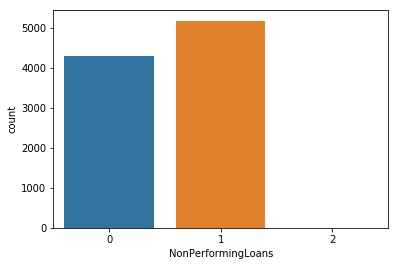

In [12]:
plot_groups(data_test['NonPerformingLoans'])

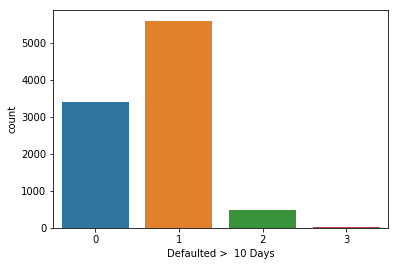

In [13]:
plot_groups(data_test['Defaulted >  10 Days'])

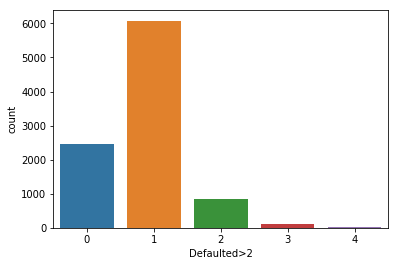

In [14]:
plot_groups(data_test['Defaulted>2'])

#### We may need to convert the Defaulted>2 & Defaulted > 10 Days on to Binary to analyze. We'll also need to drop the rows with 2 in the NonPerformingLoans columns since they seem like anomalies

In [15]:
data_testnew = data_test[data_test.NonPerformingLoans != 2]

In [16]:
#Convert LastNpaOn,LastDefault > 10 On,LastDefault > 2on to binary : nulls set to 0,not null set to 1

data_testnew[['LastNpaOn','LastDefault > 10 On', 'LastDefault > 2on']] = np.where(data_testnew[['LastNpaOn','LastDefault > 10 On', 'LastDefault > 2on']].isnull(), 0, 1)

In [17]:
#Convert Defaulted>2,Defaulted >  10 Days to binary : Anything == 0 set to 0 anything > 0 set to 1

data_testnew[['Defaulted>2','Defaulted >  10 Days']] = np.where(data_testnew[['Defaulted>2','Defaulted >  10 Days']]==0, 0, 1)

In [18]:
categories= ['LastNpaOn', 'NonPerformingLoans']
cm = sn.light_palette("green", as_cmap=True)
pd.crosstab(data_testnew[categories[0]], data_testnew[categories[1]]).style.background_gradient(cmap = cm)

In [19]:
categories= ['LastDefault > 10 On', 'Defaulted >  10 Days']
cm = sn.light_palette("green", as_cmap=True)
pd.crosstab(data_testnew[categories[0]], data_testnew[categories[1]]).style.background_gradient(cmap = cm)

In [20]:
categories= ['LastDefault > 2on', 'Defaulted>2']
cm = sn.light_palette("green", as_cmap=True)
pd.crosstab(data_testnew[categories[0]], data_testnew[categories[1]]).style.background_gradient(cmap = cm)

### From the above results :

- LastNpaOn = NonPerformingLoans

- 'LastDefault > 2on' & 'Defaulted>2' have some similarities but are not the same

- 'LastDefault > 10 On', 'Defaulted >  10 Days' have some similarities but not the same

#### Key take away, LastNpaOn will be drop. We'll have to create interaction columns for:

__('LastDefault > 2on' & 'Defaulted>2')  and ('LastDefault > 10 On', 'Defaulted >  10 Days')__

In [21]:
# We will drop rows with null MaxLoanLimit and LoanLimit
df_loans = loans.dropna(subset=['MaxLoanAmount','LoanLimit'])

In [22]:
df_l = count_null(df_loans).to_frame().reset_index()
df_l.columns = ['item','null_cols']
df_l[df_l.null_cols != 0]

item  null_cols
12        LastDefaultOn       1102
13            LastNpaOn       4005
16  LastDefault > 10 On       2103
17      LastRepaymentOn         46
19    LastDefault > 2on       5028

##### Let's investigate the LastDefaultOn column

In [23]:
#Create a dummy dataframe for investigation

df_inv = df_loans

In [24]:
# Convert the column to binary
df_inv[['LastDefaultOn']] = np.where(df_inv[['LastDefaultOn']].isnull(), 0, 1)

In [25]:
categories= ['LastDefaultOn', 'NonPerformingLoans']
cm = sn.light_palette("green", as_cmap=True)
pd.crosstab(df_inv[categories[0]], df_inv[categories[1]]).style.background_gradient(cmap = cm)

In [26]:
categories= ['LastDefaultOn', 'DefaultedLoans']
cm = sn.light_palette("green", as_cmap=True)
pd.crosstab(df_inv[categories[0]], df_inv[categories[1]]).style.background_gradient(cmap = cm)

We'll have to make a decision of dropping the rows where LastDefaultedOn is null since there seems to be a correlation between DefaultedLoans and whether a client has a default date or not. There is however a number of clients with no default dates but have non performing loans.

In [27]:
#We'll also drop the rows with last Repayment Date, 46 rows is negligable number
df_final = df_loans.dropna(subset=['LastRepaymentOn','LastDefaultOn'])

In [28]:
df_lt = count_null(df_final).to_frame().reset_index()
df_lt.columns = ['item','null_cols']
df_lt[df_lt.null_cols != 0]

item  null_cols
13            LastNpaOn       4005
16  LastDefault > 10 On       2103
19    LastDefault > 2on       4989

### Final data set operations.

- Drop LastNpaOn column
- Convert LastDefault > 10 On & LastDefault > 2on to binary
- Drop LastLimitOn column since all data is the same
- Add extra features based on the CreatedOn,LastLoanOn column
- Get the date difference between default and last payment dates
- Get the date difference between LastLoanOn and LastPaymentDate
- Add extra column based on grades categories

In [29]:
df_final.head()

ClientID  Loans  DefaultedLoans  NonPerformingLoans  ClearedLoans  \
1      3391      2               2                   1             1   
2      3423      4               1                   1             3   
3      3442      7               1                   0             7   
4      3508      8               3                   0             8   
6      3759      4               1                   0             4   

   AvgLoanAmount  LastLoanAmount  LastLoanPeriod  Lending  AvgLendingAmount  \
1      1125.0000          2000.0              10        0               0.0   
2      1250.0000          1500.0              30        0               0.0   
3      1464.8437          2000.0              10        0               0.0   
4       984.3750          1000.0              20        0               0.0   
6       500.0000           500.0              30        0               0.0   

              ...              lastMobiLoanPrincipalAmountmySector  \
1             ...                                              0.0   
2             ...                                              0.0   
3             ...                                              0.0   
4             ...                                              0.0   
6             ...                                              0.0   

  lastMobiLoanPrincipalAmountotherSector  maxMobiLoanPrincipalAmountmySector  \
1                                 7550.0                                 0.0   
2                                  400.0                                 0.0   
3                                  400.0                                 0.0   
4                                 2600.0                                 0.0   
6                                  900.0                                 0.0   

  maxMobiLoanPrincipalAmountotherSector paAccountsmySector  \
1                               11250.0                1.0   
2                                 400.0                2.0   
3                               15400.0                1.0   
4                                2600.0                0.0   
6                                 900.0                0.0   

   paAccountsotherSector npaAccountsmySector npaAccountsotherSector  \
1                   29.0                 0.0                    0.0   
2                    6.0                 0.0                    0.0   
3                   22.0                 0.0                    0.0   
4                   13.0                 0.0                    0.0   
6                   15.0                 0.0                    0.0   

   paAccountsWithDhmySector paAccountsWithDhotherSector  
1                       0.0                         1.0  
2                       0.0                         0.0  
3                       0.0                         1.0  
4                       0.0                         0.0  
6                       0.0                         0.0  

[5 rows x 40 columns]

In [30]:
#Create a dataframe without the dropped columns
dropcolumns_df = df_final.drop(["LastNpaOn","LastLimitOn"],axis = 1)

In [31]:
#Check the column type
dropcolumns_df['Createdon'].describe()

count                        9042
unique                       9038
top       2018-04-23 12:25:30.000
freq                            2
Name: Createdon, dtype: object

In [32]:
#Check the column type
dropcolumns_df['LastLoanOn'].describe()

count                        9042
unique                       9042
top       2018-12-21 10:19:30.023
freq                            1
Name: LastLoanOn, dtype: object

In [33]:
#to_date(dropcolumns_df,"Createdon")
#to_date(dropcolumns_df,"LastLoanOn")

In [34]:
dropcolumns_df['LastLoanOn'].describe()

count                        9042
unique                       9042
top       2018-12-21 10:19:30.023
freq                            1
Name: LastLoanOn, dtype: object

In [35]:
dropcolumns_df['Createdon'].describe()

count                        9042
unique                       9038
top       2018-04-23 12:25:30.000
freq                            2
Name: Createdon, dtype: object

In [36]:
add_datepart(dropcolumns_df,"LastLoanOn")

In [37]:
dropcolumns_df.head()

ClientID  Loans  DefaultedLoans  NonPerformingLoans  ClearedLoans  \
1      3391      2               2                   1             1   
2      3423      4               1                   1             3   
3      3442      7               1                   0             7   
4      3508      8               3                   0             8   
6      3759      4               1                   0             4   

   AvgLoanAmount  LastLoanAmount  LastLoanPeriod  Lending  AvgLendingAmount  \
1      1125.0000          2000.0              10        0               0.0   
2      1250.0000          1500.0              30        0               0.0   
3      1464.8437          2000.0              10        0               0.0   
4       984.3750          1000.0              20        0               0.0   
6       500.0000           500.0              30        0               0.0   

            ...             LastLoanOnWeek LastLoanOnDay  LastLoanOnDayofweek  \
1           ...                         37            15                    5   
2           ...                         19             7                    0   
3           ...                         21            27                    6   
4           ...                         39            26                    2   
6           ...                         28            15                    6   

  LastLoanOnDayofyear  LastLoanOnIs_month_end LastLoanOnIs_month_start  \
1                 258                   False                    False   
2                 127                   False                    False   
3                 147                   False                    False   
4                 269                   False                    False   
6                 196                   False                    False   

  LastLoanOnIs_quarter_end  LastLoanOnIs_quarter_start LastLoanOnIs_year_end  \
1                    False                       False                 False   
2                    False                       False                 False   
3                    False                       False                 False   
4                    False                       False                 False   
6                    False                       False                 False   

   LastLoanOnIs_year_start  
1                    False  
2                    False  
3                    False  
4                    False  
6                    False  

[5 rows x 50 columns]

In [38]:
add_datepart(dropcolumns_df,"Createdon")

In [39]:
dropcolumns_df.head()

ClientID  Loans  DefaultedLoans  NonPerformingLoans  ClearedLoans  \
1      3391      2               2                   1             1   
2      3423      4               1                   1             3   
3      3442      7               1                   0             7   
4      3508      8               3                   0             8   
6      3759      4               1                   0             4   

   AvgLoanAmount  LastLoanAmount  LastLoanPeriod  Lending  AvgLendingAmount  \
1      1125.0000          2000.0              10        0               0.0   
2      1250.0000          1500.0              30        0               0.0   
3      1464.8437          2000.0              10        0               0.0   
4       984.3750          1000.0              20        0               0.0   
6       500.0000           500.0              30        0               0.0   

            ...            CreatedonWeek CreatedonDay  CreatedonDayofweek  \
1           ...                       12           22                   3   
2           ...                       12           22                   3   
3           ...                       12           22                   3   
4           ...                       12           22                   3   
6           ...                       12           22                   3   

  CreatedonDayofyear  CreatedonIs_month_end CreatedonIs_month_start  \
1                 81                  False                   False   
2                 81                  False                   False   
3                 81                  False                   False   
4                 81                  False                   False   
6                 81                  False                   False   

  CreatedonIs_quarter_end  CreatedonIs_quarter_start CreatedonIs_year_end  \
1                   False                      False                False   
2                   False                      False                False   
3                   False                      False                False   
4                   False                      False                False   
6                   False                      False                False   

   CreatedonIs_year_start  
1                   False  
2                   False  
3                   False  
4                   False  
6                   False  

[5 rows x 62 columns]

In [40]:
days_time_diff (dropcolumns_df,"LastLoanOn","Createdon","signup_to_loansapp_days")
days_time_diff (dropcolumns_df,"LastRepaymentOn","LastLoanOn","Loanapp_to_Lastpayment_days")

In [43]:
dropcolumns_df.head()

ClientID  Loans  DefaultedLoans  NonPerformingLoans  ClearedLoans  \
1      3391      2               2                   1             1   
2      3423      4               1                   1             3   
3      3442      7               1                   0             7   
4      3508      8               3                   0             8   
6      3759      4               1                   0             4   

   AvgLoanAmount  LastLoanAmount  LastLoanPeriod  Lending  AvgLendingAmount  \
1      1125.0000          2000.0              10        0               0.0   
2      1250.0000          1500.0              30        0               0.0   
3      1464.8437          2000.0              10        0               0.0   
4       984.3750          1000.0              20        0               0.0   
6       500.0000           500.0              30        0               0.0   

              ...               CreatedonDayofweek CreatedonDayofyear  \
1             ...                                3                 81   
2             ...                                3                 81   
3             ...                                3                 81   
4             ...                                3                 81   
6             ...                                3                 81   

   CreatedonIs_month_end CreatedonIs_month_start  CreatedonIs_quarter_end  \
1                  False                   False                    False   
2                  False                   False                    False   
3                  False                   False                    False   
4                  False                   False                    False   
6                  False                   False                    False   

  CreatedonIs_quarter_start CreatedonIs_year_end  CreatedonIs_year_start  \
1                     False                False                   False   
2                     False                False                   False   
3                     False                False                   False   
4                     False                False                   False   
6                     False                False                   False   

  signup_to_loansapp_days  Loanapp_to_Lastpayment_days  
1                     177                          -46  
2                      46                          -17  
3                      65                          -20  
4                     187                           32  
6                     114                           30  

[5 rows x 64 columns]

In [44]:
#Convert LastNpaOn,LastDefault > 10 On,LastDefault > 2on to binary : nulls set to 0,not null set to 1

dropcolumns_df[['LastDefault > 10 On', 'LastDefault > 2on']] = np.where(dropcolumns_df[['LastDefault > 10 On', 'LastDefault > 2on']].isnull(), 0, 1)

In [45]:
dropcolumns_df['LastDefault > 10 On'].head()

1    1
2    1
3    0
4    1
6    0
Name: LastDefault > 10 On, dtype: int64

In [46]:
#Add new column based on categorical codes of the grade column
dropcolumns_df["grade_codes"] = dropcolumns_df.grade.astype("category").cat.codes

In [47]:
#Write final dataframe to csv
dropcolumns_df.to_csv('loans.csv', index=False)